In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [18]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [19]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
 ['measurement', 'station']

['measurement', 'station']

In [22]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [25]:
# Calculate the date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=365)


In [47]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
print("===Measurement===")
for c in columns:
    print(c['name'], c["type"])
print("===Station===")
columns = inspector.get_columns('station')
for d in columns:
    print(d['name'], d["type"])

===Measurement===
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
===Station===
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [27]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index(df['date'], inplace=True)

In [29]:
# Sort the dataframe by date
df.sort_values("date")

,date,prcp
date,,
2017-08-04,2017-08-04,0.02
2017-08-04,2017-08-04,0.04
2017-08-04,2017-08-04,0.00
2017-08-04,2017-08-04,0.00
2017-08-05,2017-08-05,0.06
2017-08-05,2017-08-05,0.00
2017-08-05,2017-08-05,NaN
2017-08-06,2017-08-06,NaN
2017-08-06,2017-08-06,0.00


<IPython.core.display.Javascript object>


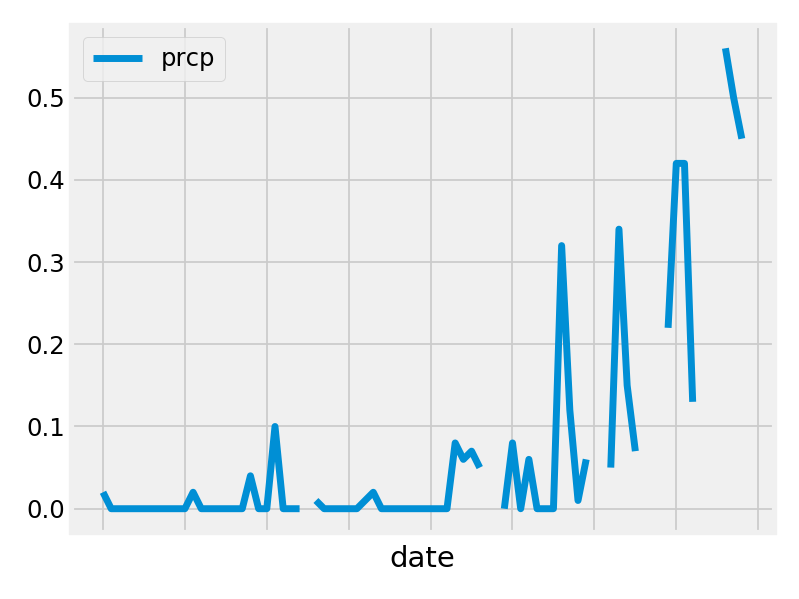

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x_compat=True)

In [44]:
# Rotate the xticks for the dates
plt.xticks(rotation='90')
plt.tight_layout()

In [45]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,70.000000
mean,0.066714
std,0.132246
min,0.000000
25%,0.000000
50%,0.000000
75%,0.067500
max,0.560000


In [48]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [67]:
# What are the most active stations?
# list the stations and the counts in descending order.
list_station = session.query(Measurement.station)
station_biggest= list_station.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
station_biggest

('USC00519281')

In [69]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


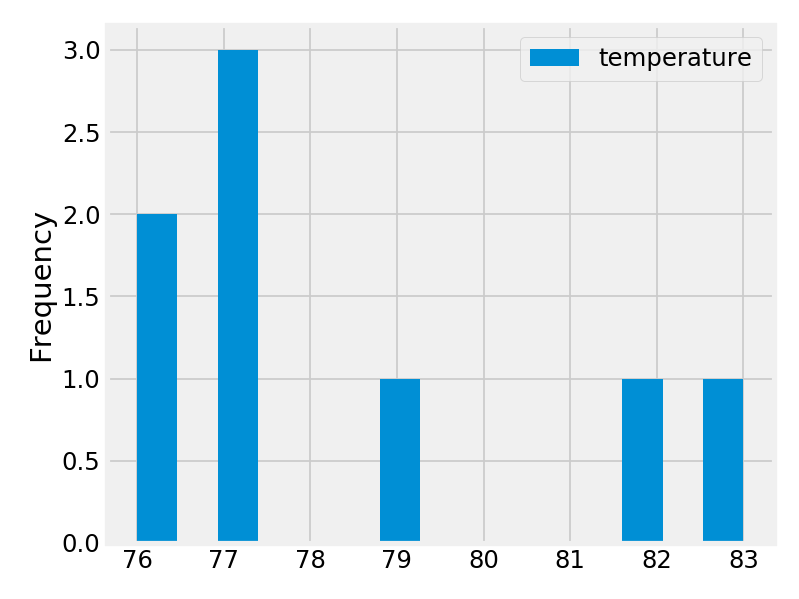

In [79]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from pandas.plotting import table
from sqlalchemy import and_
year_ago = dt.date.today() - dt.timedelta(days=365)

temperature = session.query(Measurement.tobs).\
    filter(and_(Measurement.station == 'USC00519281', Measurement.date >= year_ago)).all()
df = pd.DataFrame(temperature, columns=['temperature'])
df.plot.hist(bins=15)
plt.tight_layout()

In [97]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
  
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
           .filter(and_(Measurement.date >= start_date,Measurement.date <= end_date)).all()
print(calc_temps('2017-01-01', '2017-01-30'))

[(60.0, 69.7445652173913, 81.0)]


In [99]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
import datetime as dt

last_year_start = dt.date(2017, 1, 1) - dt.timedelta(days=365)
last_year_end = dt.date(2017, 1, 30) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(last_year_start.strftime("%Y-%m-%d"), last_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

61.0 69.65730337078652 78.0


<IPython.core.display.Javascript object>


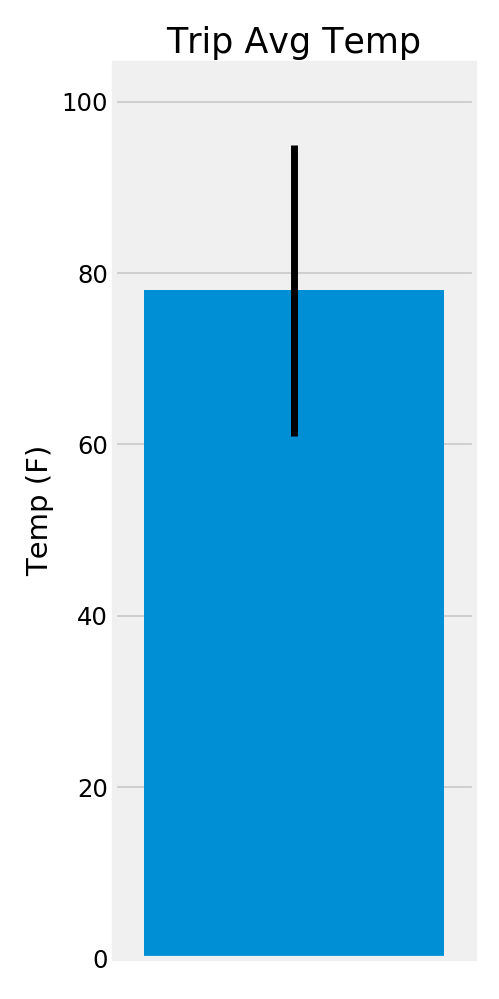

In [104]:
 # Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.1, .1)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()

In [83]:
 # Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2012-01-01'
end_date = '2012-01-07'

sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]
